<a href="https://colab.research.google.com/github/Minorito/LogisticRegression_Music/blob/main/LogisticRegression_Est%C3%A1gioPesquisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import minmax_scale, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint
import xgboost as xgb
import librosa, IPython
from IPython.display import display
import librosa.display
from tqdm import tqdm
import random
from sklearn.model_selection import KFold

In [ ]:
seed = 42
random.seed = seed
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/My Drive/musicas/datasets/Data/features_3_sec.csv')
print("Dataset has", data.shape)
data.head()
genres = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

Dataset has (9990, 60)


In [ ]:
label_encoder = LabelEncoder()
labels = data['label']
label_encoder.fit(labels)
data.insert(60, 'label_id', 9999)
data.insert(1, 'filename_full', '')
for i in range(len(data)):
    label = data.loc[i,'label']
    label_id =label_encoder.transform([label])
    data.loc[i,'label_id']=label_id.item()
    data.loc[i,'filename_full']=str(data.loc[i,'filename']).split('.')[0]+"."+str(data.loc[i,'filename']).split('.')[1]+"."+str(data.loc[i,'filename']).split('.')[3]
data['label_id']=data['label_id'].astype(int)

In [ ]:
X_full = data.drop(['filename','filename_full', 'length','label', 'label_id'], axis = 1)
y_full = data['label_id'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state = seed, shuffle = True)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
acc_per_fold = []
loss_per_fold = []
num_folds = 10
fold_no = 1

In [ ]:
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [ ]:
kfold = KFold(n_splits=num_folds, shuffle=True)

In [ ]:
for train, test in kfold.split(inputs, targets):
    model = LogisticRegression(random_state=seed)

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    model.fit(inputs[train],targets[train])
    
    acc_per_fold.append(model.score(inputs[test], targets[test]) * 100)
    loss_per_fold.append(model.score(inputs[test], targets[test]))

    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...


In [ ]:
    print('------------------------------------------------------------------------')
    print('Score per fold')
    for i in range(0, len(acc_per_fold)):
      print('------------------------------------------------------------------------')
      print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')

    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')
    print('------------------------------------------------------------------------')    

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.7067067067067067 - Accuracy: 70.67067067067066%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.7277277277277278 - Accuracy: 72.77277277277278%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.7417417417417418 - Accuracy: 74.17417417417418%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.7367367367367368 - Accuracy: 73.67367367367368%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.7207207207207207 - Accuracy: 72.07207207207207%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.7237237237237237 - Accuracy: 72.37237237237237%
------------------------------------------------------------------------

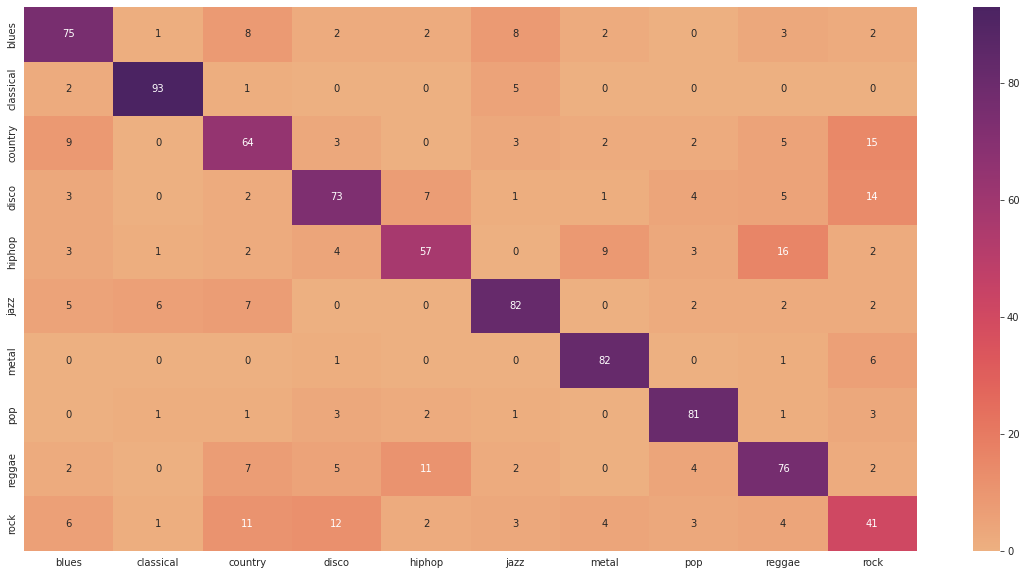

In [ ]:
y_pred_test = model.predict(inputs[test])
cm = confusion_matrix(targets[test], y_pred_test)
plt.figure(figsize = (20, 10))
sns.heatmap(cm, cmap="flare", annot=True, xticklabels = genres, yticklabels= genres);
plt.show()

In [ ]:
matriz_total= np.sum(cm)
print(f'Soma de todos elementos da matriz {matriz_total}')

n = 10

diagonal_principal = sum(cm[i][i] for i in range(n))
print(f'Soma diagonal principal {diagonal_principal}')

print(f'Matriz Confusão: {(diagonal_principal/matriz_total)*100}%')

Soma de todos elementos da matriz 999
Soma diagonal principal 724
Matriz Confusão: 72.47247247247248%


In [ ]:
print(classification_report(targets[test], y_pred_test, digits=3, target_names=genres))

              precision    recall  f1-score   support

       blues      0.714     0.728     0.721       103
   classical      0.903     0.921     0.912       101
     country      0.621     0.621     0.621       103
       disco      0.709     0.664     0.685       110
      hiphop      0.704     0.588     0.640        97
        jazz      0.781     0.774     0.777       106
       metal      0.820     0.911     0.863        90
         pop      0.818     0.871     0.844        93
      reggae      0.673     0.697     0.685       109
        rock      0.471     0.471     0.471        87

    accuracy                          0.725       999
   macro avg      0.721     0.725     0.722       999
weighted avg      0.723     0.725     0.723       999

